# importing the required packages


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Reading and Importing data

In [4]:
student_scores_df =  pd.read_csv("http://bit.ly/w-data")

In [6]:
student_scores_df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [7]:
student_scores_df.shape

(25, 2)

In [8]:
student_scores_df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


plt.scatter(student_scores_df.Hours, student_scores_df.Scores,  color='blue')
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

# CREATING TRAIN AND TEST DATASET

# Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

This means that we know the outcome of each data point in this dataset, making it great to test with! And since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, it is truly an out-of-sample testing.

Lets split our dataset into train and test sets, 80% of the entire data for training, and the 20% for testing.

In [11]:
X = student_scores_df.Hours
y = student_scores_df.Scores

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0)

# SIMPLE REGRESSION MODEL

In [12]:
X_train_lm = X_train.values.reshape(-1,1)
X_test_lm =X_test.values.reshape(-1,1)

# MODELLING

In [14]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

regr.fit(X_train_lm, y_train)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [9.91065648]
Intercept:  2.018160041434683


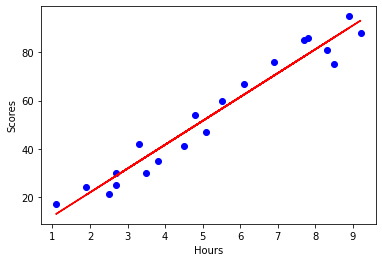

In [15]:
plt.scatter(X_train_lm, y_train, color='blue')
plt.plot(X_train_lm, regr.coef_[0]*X_train_lm + regr.intercept_, '-r')
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

# EVALUATION

In [16]:
from sklearn.metrics import r2_score

test_y2 = regr.predict(X_test_lm)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y2 - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y2 - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_test , test_y2) )

Mean absolute error: 4.18
Residual sum of squares (MSE): 21.60
R2-score: 0.95


In [17]:
hours = [[9.25]]
score925 = regr.predict(hours)
print("Predicted Score = %.2f" %score925[0])

Predicted Score = 93.69
